# Leitura e visualização de dados 

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#9467bd", "#057476", "#FF7A00"]
sns.set_theme(style="ticks", palette=sns.color_palette(colors))

# Leitura do conjunto de dados
df = pd.read_csv('../data/raw/data.csv')
print(df.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

## 1. Descrição dos dados 

In [16]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
print(dicionario)


           variavel                                          descricao  \
0         RowNumber  Número da linha, usado como identificador sequ...   
1        CustomerId                     Identificador único do cliente   
2           Surname                               Sobrenome do cliente   
3       CreditScore                    Pontuação de crédito do cliente   
4         Geography                      País de residência do cliente   
5            Gender                    Gênero do cliente (Male/Female)   
6               Age                                   Idade do cliente   
7            Tenure  Tempo de permanência do cliente no banco (em a...   
8           Balance                          Saldo da conta do cliente   
9     NumOfProducts   Número de produtos que o cliente possui no banco   
10        HasCrCard  Indica se o cliente possui um cartão de crédit...   
11   IsActiveMember  Indica se o cliente é um membro ativo (1) ou n...   
12  EstimatedSalary                   

## 2. Análise Exploratória

In [17]:
# Verificando valores faltantes
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()

print(number_of_na_by_column)
print(f"{number_of_na_rows} linhas têm valores faltantes.")

# Removendo linhas com valores faltantes
df.dropna(inplace=True)


Series([], dtype: int64)
0 linhas têm valores faltantes.


Este conjunto de dados contém informações sobre clientes bancários e seu status de rotatividade, o que indica se eles saíram do banco ou não. É adequado para explorar e analisar fatores que influenciam a rotatividade de clientes em instituições bancárias e para construir modelos preditivos para identificar clientes em risco de rotatividade.


## 2.1. Descrição Estatística

In [18]:
df.describe(include='all')


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


- São 14  variáveis, com 5 quantitativas discretas, 4 qualitativas nominais e e quantitativas continua .

## 3. Visualização da Relação Entre Variáveis

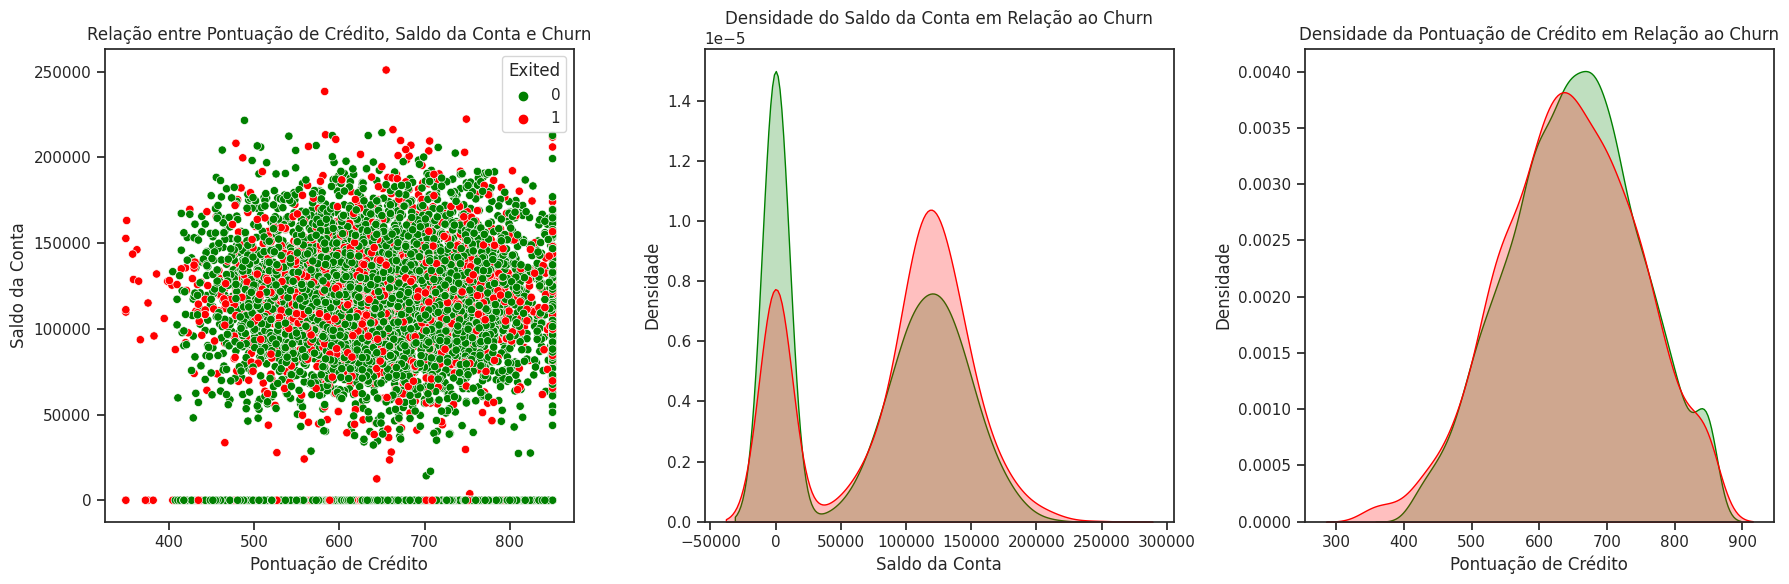

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de Dispersão
sns.scatterplot(x='CreditScore', y='Balance', hue='Exited', data=df, ax=axs[0], palette=['green', 'red'])
axs[0].set_title('Relação entre Pontuação de Crédito, Saldo da Conta e Churn')
axs[0].set_xlabel('Pontuação de Crédito')
axs[0].set_ylabel('Saldo da Conta')

# Gráfico de Densidade - Saldo
sns.kdeplot(data=df[df['Exited'] == 0], x='Balance', label='Não Saiu', shade=True, ax=axs[1], color='green')
sns.kdeplot(data=df[df['Exited'] == 1], x='Balance', label='Saiu', shade=True, ax=axs[1], color='red')
axs[1].set_title('Densidade do Saldo da Conta em Relação ao Churn')
axs[1].set_xlabel('Saldo da Conta')
axs[1].set_ylabel('Densidade')

# Gráfico de Densidade - Pontuação de Crédito
sns.kdeplot(data=df[df['Exited'] == 0], x='CreditScore', label='Não Saiu', shade=True, ax=axs[2], color='green')
sns.kdeplot(data=df[df['Exited'] == 1], x='CreditScore', label='Saiu', shade=True, ax=axs[2], color='red')
axs[2].set_title('Densidade da Pontuação de Crédito em Relação ao Churn')
axs[2].set_xlabel('Pontuação de Crédito')
axs[2].set_ylabel('Densidade')

plt.tight_layout()
plt.show()
